# predictive analytics model for natural disasters, such as hurricanes

In [1]:
# importing the required libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# read the existing file

path = 'Downloads/temp_disaster_merge_new.csv'
df = pd.read_csv(path)

In [3]:
# show the data
df.head()

,disaster_number,STATE,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,fips,place_code,designated_area,...,month_x,month_year,TEMPERATURE_ID,DATE,Country,Fahrenheit,AverageTemperatureF,AverageTemperatureUncertaintyF,year_y,month_y
0,1796,AK,DR,26-09-2008,2008,Severe Storm(s),"Severe Storms, Flooding, Landslides, And Mudsl...",2090,99090,Fairbanks North Star (Borough),...,9,2008-09,1398,01-09-2008,United States,74.696,40.5392,32.4518,2008,9
1,1796,AK,DR,26-09-2008,2008,Severe Storm(s),"Severe Storms, Flooding, Landslides, And Mudsl...",2068,99068,Denali (Borough),...,9,2008-09,1398,01-09-2008,United States,74.696,40.5392,32.4518,2008,9
2,1796,AK,DR,26-09-2008,2008,Severe Storm(s),"Severe Storms, Flooding, Landslides, And Mudsl...",2185,99185,North Slope (Borough),...,9,2008-09,1398,01-09-2008,United States,74.696,40.5392,32.4518,2008,9
3,1796,AK,DR,26-09-2008,2008,Severe Storm(s),"Severe Storms, Flooding, Landslides, And Mudsl...",2290,86650,Yukon Koyukuk Regional Educational Attendance ...,...,9,2008-09,1398,01-09-2008,United States,74.696,40.5392,32.4518,2008,9
4,1440,AK,DR,08-11-2002,2003,Earthquake,Earthquake,2170,99170,Matanuska-Susitna (Borough),...,11,2002-11,1328,01-11-2002,United States,-27.373,20.1254,32.4266,2002,11


In [4]:
# checking the null values
df.isnull().sum()

disaster_number                   0
STATE                             0
declaration_type                  0
declaration_date                  0
fy_declared                       0
incident_type                     0
declaration_title                 0
fips                              0
place_code                        0
designated_area                   0
declaration_request_number        0
hash                              0
last_refresh                      0
id                                0
year_x                            0
month_x                           0
month_year                        0
TEMPERATURE_ID                    0
DATE                              0
Country                           0
Fahrenheit                        0
AverageTemperatureF               0
AverageTemperatureUncertaintyF    0
year_y                            0
month_y                           0
dtype: int64

# Preprocess the data

In [5]:
# Dropping columns we won't use

disaster_temp_concise = df.drop(columns=["fy_declared", "declaration_date", "declaration_title", "hash", "last_refresh", "id", "month_year", 'TEMPERATURE_ID', 'DATE',
       'Country', 'Fahrenheit', 'AverageTemperatureUncertaintyF', 'year_y', 'month_y'])

disaster_temp_concise.head()

,disaster_number,STATE,declaration_type,incident_type,fips,place_code,designated_area,declaration_request_number,year_x,month_x,AverageTemperatureF
0,1796,AK,DR,Severe Storm(s),2090,99090,Fairbanks North Star (Borough),8159,2008,9,40.5392
1,1796,AK,DR,Severe Storm(s),2068,99068,Denali (Borough),8159,2008,9,40.5392
2,1796,AK,DR,Severe Storm(s),2185,99185,North Slope (Borough),8159,2008,9,40.5392
3,1796,AK,DR,Severe Storm(s),2290,86650,Yukon Koyukuk Regional Educational Attendance ...,8159,2008,9,40.5392
4,1440,AK,DR,Earthquake,2170,99170,Matanuska-Susitna (Borough),2145,2002,11,20.1254


In [6]:
# know about the data types of those attributes
disaster_temp_concise.dtypes

disaster_number                 int64
STATE                          object
declaration_type               object
incident_type                  object
fips                            int64
place_code                      int64
designated_area                object
declaration_request_number      int64
year_x                          int64
month_x                         int64
AverageTemperatureF           float64
dtype: object

# ONE HOT ENCODING

In [7]:
# encode incident type
dt_encoded = pd.get_dummies(disaster_temp_concise, columns=["incident_type"])
dt_encoded.columns

Index(['disaster_number', 'STATE', 'declaration_type', 'fips', 'place_code',
       'designated_area', 'declaration_request_number', 'year_x', 'month_x',
       'AverageTemperatureF', 'incident_type_Coastal Storm',
       'incident_type_Dam/Levee Break', 'incident_type_Drought',
       'incident_type_Earthquake', 'incident_type_Fire',
       'incident_type_Fishing Losses', 'incident_type_Flood',
       'incident_type_Freezing', 'incident_type_Human Cause',
       'incident_type_Hurricane', 'incident_type_Mud/Landslide',
       'incident_type_Severe Ice Storm', 'incident_type_Severe Storm(s)',
       'incident_type_Snow', 'incident_type_Terrorist',
       'incident_type_Tornado', 'incident_type_Toxic Substances',
       'incident_type_Tsunami', 'incident_type_Typhoon',
       'incident_type_Volcano'],
      dtype='object')

In [8]:
# drop columns so only using hurricane data 
dt_hurricane = dt_encoded.drop(columns=[
       'incident_type_Coastal Storm',
       'incident_type_Dam/Levee Break', 'incident_type_Drought',
       'incident_type_Earthquake', 'incident_type_Fire',
       'incident_type_Fishing Losses', 'incident_type_Flood',
       'incident_type_Freezing', 'incident_type_Human Cause','incident_type_Mud/Landslide',
       'incident_type_Severe Ice Storm', 'incident_type_Severe Storm(s)',
       'incident_type_Snow', 'incident_type_Terrorist',
       'incident_type_Tornado', 'incident_type_Toxic Substances',
       'incident_type_Tsunami', 'incident_type_Typhoon',
       'incident_type_Volcano'])
dt_hurricane.head()

,disaster_number,STATE,declaration_type,fips,place_code,designated_area,declaration_request_number,year_x,month_x,AverageTemperatureF,incident_type_Hurricane
0,1796,AK,DR,2090,99090,Fairbanks North Star (Borough),8159,2008,9,40.5392,0
1,1796,AK,DR,2068,99068,Denali (Borough),8159,2008,9,40.5392,0
2,1796,AK,DR,2185,99185,North Slope (Borough),8159,2008,9,40.5392,0
3,1796,AK,DR,2290,86650,Yukon Koyukuk Regional Educational Attendance ...,8159,2008,9,40.5392,0
4,1440,AK,DR,2170,99170,Matanuska-Susitna (Borough),2145,2002,11,20.1254,0


In [9]:
# checking dtypes
dt_hurricane.dtypes

disaster_number                 int64
STATE                          object
declaration_type               object
fips                            int64
place_code                      int64
designated_area                object
declaration_request_number      int64
year_x                          int64
month_x                         int64
AverageTemperatureF           float64
incident_type_Hurricane         uint8
dtype: object

In [10]:
# encode object columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt_hurricane["STATE"] = le.fit_transform(dt_hurricane["STATE"])
dt_hurricane["declaration_type"] = le.fit_transform(dt_hurricane["declaration_type"])
dt_hurricane["place_code"] = le.fit_transform(dt_hurricane["place_code"])
dt_hurricane["designated_area"] = le.fit_transform(dt_hurricane["designated_area"])

In [11]:
dt_hurricane

,disaster_number,STATE,declaration_type,fips,place_code,designated_area,declaration_request_number,year_x,month_x,AverageTemperatureF,incident_type_Hurricane
0,1796,0,0,2090,216,564,8159,2008,9,40.5392,0
1,1796,0,0,2068,201,477,8159,2008,9,40.5392,0
2,1796,0,0,2185,269,1227,8159,2008,9,40.5392,0
3,1796,0,0,2290,154,1926,8159,2008,9,40.5392,0
4,1440,0,0,2170,260,1068,2145,2002,11,20.1254,0
...,...,...,...,...,...,...,...,...,...,...,...
40727,2460,48,2,56023,174,997,2126,2002,8,63.0392,0
40728,1268,48,0,56027,176,1217,99017,1999,2,28.6178,0
40729,1268,48,0,56015,169,669,99017,1999,2,28.6178,0
40730,2993,48,2,56001,159,15,12050,2012,7,70.4534,0


In [12]:
# checking dtypes
dt_hurricane.dtypes

disaster_number                 int64
STATE                           int32
declaration_type                int32
fips                            int64
place_code                      int64
designated_area                 int32
declaration_request_number      int64
year_x                          int64
month_x                         int64
AverageTemperatureF           float64
incident_type_Hurricane         uint8
dtype: object

In [13]:
# check for nulls
dt_hurricane.isnull().sum()

disaster_number               0
STATE                         0
declaration_type              0
fips                          0
place_code                    0
designated_area               0
declaration_request_number    0
year_x                        0
month_x                       0
AverageTemperatureF           0
incident_type_Hurricane       0
dtype: int64

In [14]:
# check count 
len(dt_hurricane["disaster_number"])

40732

# Test and Train the Data 

# x--->Independent variable

# y--->Dependent variable

In [15]:
# split into X and Y valuese
y = dt_hurricane["incident_type_Hurricane"]
X = dt_hurricane.drop(columns=["incident_type_Hurricane"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [16]:
# scale and normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaler  = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# BUILD MODEL BY USING LOGISTIC REGRESSION

In [17]:
# instantate Logistic Regression
classifier = LogisticRegression(random_state=1)

In [18]:
# fit model
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [19]:
#predict
y_predict = classifier.predict(X_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8999312579789845

In [21]:
# # Import seaborn library for visualize the prediction
# import seaborn as sns
# sns.distplot(y_test-y_predict)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,7833,460
Actual 1,559,1331


# BUILD MODEL BY USING RANDOM FOREST REGRESSSION

In [23]:
# Import the required libraries
# random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [26]:
# Train the Random Forest Regressor
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Make predictions on the testing set
y_pred = rf.predict(X_test)

In [38]:
# Evaluate the model's performance
sc1=r2_score(y_test, y_pred)
print('R2 score:', sc1)

R2 score: 0.9905151150583942


In [29]:
# Evaluate the performance of the model on the test data
score = rf.score(X_test, y_test)
print("Model score on test data:", score)


Model score on test data: 0.9905151150583942


C:\Users\STARJAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='incident_type_Hurricane', ylabel='Density'>

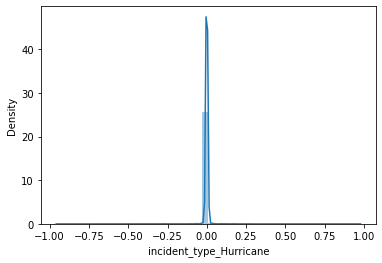

In [30]:
# Import seaborn library for visualize the prediction
import seaborn as sns
sns.distplot(y_test-y_pred)

# BUILD MODEL BY USING GRADIENT BOOSTING REGRESSSION

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
# Initialize the Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [33]:
# Train the Gradient Boosting Regressor
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [34]:
# Make predictions on the testing set
Y_pred = gb.predict(X_test)

In [37]:
# Evaluate the model's performance
sc=r2_score(y_test, Y_pred)
print('R2 score:',sc )

R2 score: 0.8570125763892293


# BUILD MODEL BY USING SUPPORT VECTOR MACHINE

In [33]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

In [34]:
# svm = SVC(kernel='linear', C=1.0, random_state=42)

In [ ]:
# svm.fit(X_train, y_train)

In [40]:
# y_pred = svm.predict(X_test)

In [41]:
# print('Accuracy:', accuracy_score(y_test, y_pred))

# Visualize the models

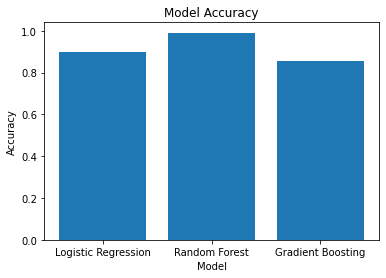

In [44]:
import matplotlib.pyplot as plt

# Define the names and accuracy scores of your models
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [0.8999312579789845, 0.9905151150583942, 0.8570125763892293]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(model_names, accuracy_scores)

# Set the chart title and axis labels
ax.set_title('Model Accuracy')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')

# Display the chart
plt.show()